## Desafío - Regresión desde la econometría

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

### Contexto

En este desafío trabajaremos con un registro de clientes de un banco e información sobre su salud
financiera. La base contenida en el csv Credit contiene las siguientes variables:

* Income : Ingreso anual disponible en miles de dólares.
* Limit : Límite del crédito.
* Rating : Ranking del crédito.
* Cards : Cantidad de tarjetas de credito.
* Age : Edad del usuario.
* Education : Años de educación del usuario.
* Gender : ¿Hombre o mujer?
* Student : ¿Es estudiante?
* Married : ¿Está casado?
* Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
* Balance : Promedio de deuda en tarjeta de crédito de usuario.

Para efectos prácticos del desafío, nos interesa saber sobre los determinantes de la variación en el
promedio de deuda en tarjeta de crédito.

A lo largo del desafío generaremos modelos econométricos para inspeccionar los efectos de
distintos atributos


### Desafío 1: Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels .
* Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity, genere binarias para AfricanAmerican y Asian.
    * tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

In [58]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6, 2) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

df = pd.read_csv('Credit.csv')
df_clean = df.drop(['Unnamed: 0'], axis =1)

df_clean['is_Female'] = np.where(df['Gender'] == 'Female', 1, 0)
df_clean['is_Student'] = np.where(df['Student'] == 'Yes', 1, 0)
df_clean['is_Married'] = np.where(df['Married'] == 'Yes', 1, 0)
df_clean['is_AfricanAmerican'] = np.where(df['Ethnicity'] == 'African American', 1, 0)
df_clean['is_Asian'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)
df_clean['is_Caucasian'] = np.where(df['Ethnicity'] == 'Caucasian', 1, 0)
df_clean.head()


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,is_Female,is_Student,is_Married,is_AfricanAmerican,is_Asian,is_Caucasian
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1,0,0,1
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1,0,1,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,0,0,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0,0,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1,0,0,1


### Desafío 2: Genere gráficos descriptivos para las variables contínuas

* Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

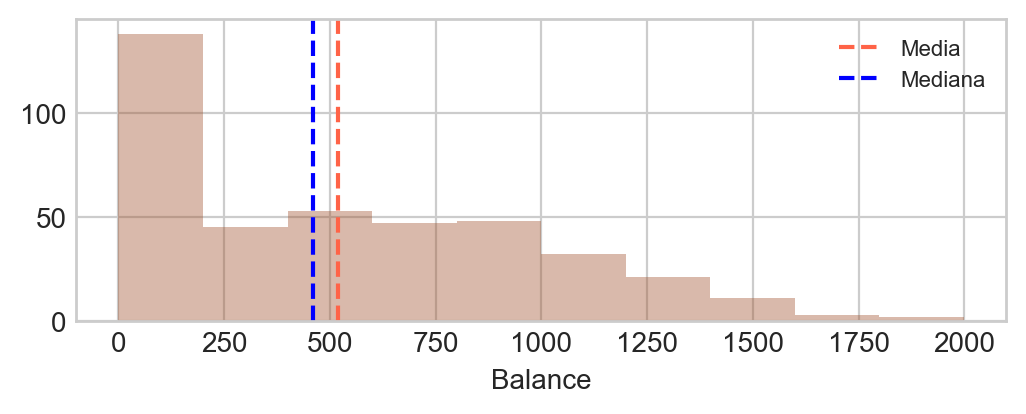

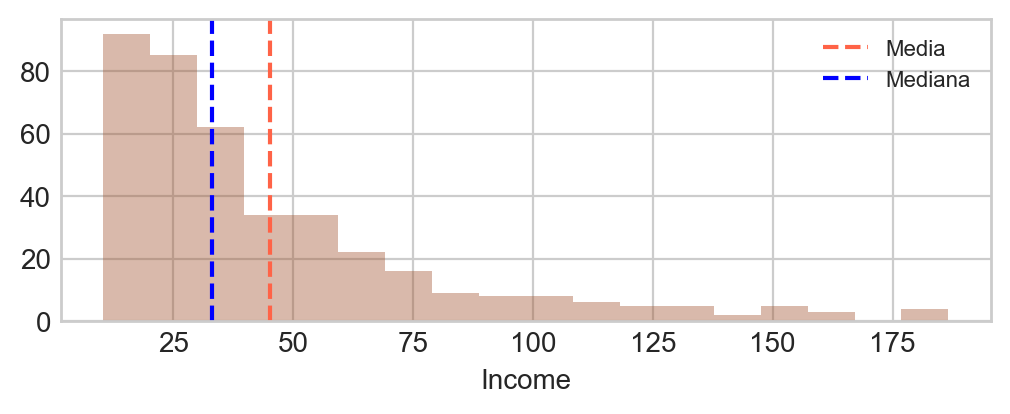

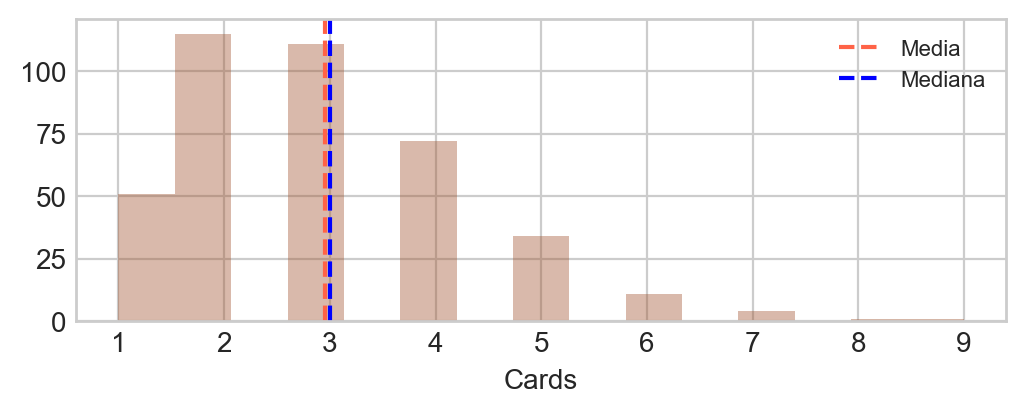

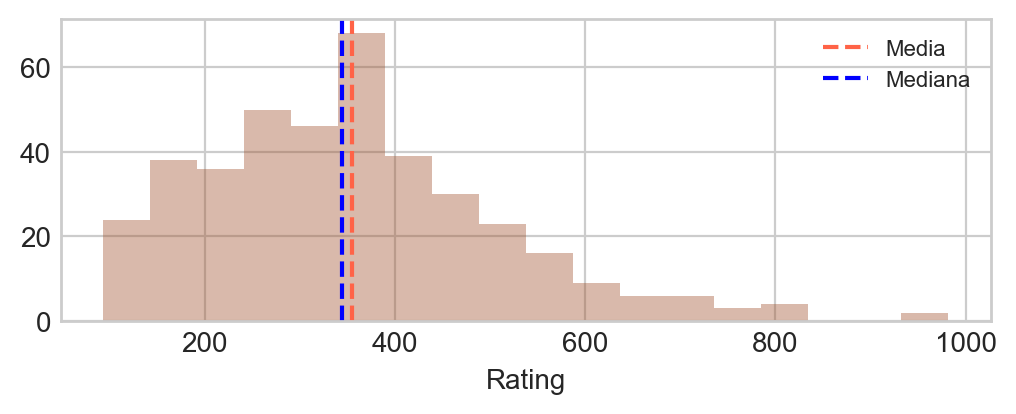

In [45]:
def plot_hist(dataframe, variable):
    hist = dataframe[variable].dropna()
    plt.figure()
    sns.distplot(hist, color='sienna', kde=False)
    plt.axvline(np.mean(hist), label="Media", color="tomato", linestyle = '--')
    plt.axvline(np.median(hist), label="Mediana", color="blue", linestyle = '--')
    plt.legend(loc=0, fontsize = 8)
    
for var in ['Balance', 'Income', 'Cards', 'Rating']:
    plot_hist(df_clean, var)

### Desafío 3: Regresión Lineal Simple

* A continuación generaremos una serie de modelos simples:


$${Balance}={{\beta }_{0} + {\beta }_{1} \cdot {Student} +{\epsilon}_{i}}$$

$${Balance}={{\beta }_{0} + {\beta }_{1} \cdot {Income} +{\epsilon}_{i}}$$

$${Balance}={{\beta }_{0} + {\beta }_{1} \cdot {Rating} +{\epsilon}_{i}}$$



* Utilizando statsmodels , comente brevemente los siguientes puntos:
    * ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
    * ¿Qué podemos decir sobre el comportamiento de Student ?
        * ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?



In [46]:
model1 = smf.ols('Balance ~ is_Student', data = df_clean).fit()
model2 = smf.ols('Balance ~ Income', data = df_clean).fit()
model3 = smf.ols('Balance ~ Rating', data = df_clean).fit()

In [34]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.49e-07
Time:                        21:02:36   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
is_Student   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.03e-22
Time:                        20:58:42   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 02 Jul 2019   Prob (F-statistic):          1.90e-120
Time:                        20:57:31   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### La variable Rating tiene un mayor poder explicativo de la variabilidad
### Si es estudiante la deuda del usuario aumenta en 396

In [39]:
df_is_Student = df_clean.query("is_Student == 1")['Balance']
df_is_not_Student = df_clean.query("is_Student == 0")['Balance']
t, pval = stats.ttest_ind(df_is_Student, df_is_not_Student)
print("t: {}".format(t))
print("pval: {}".format(pval))

t: 5.349964123075003
pval: 1.4877341077323024e-07


### Al aplicar una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes se rechaza la hipótesis nula, siendo el promedio de estas distintos.

### Desafío 4: Genere un modelo que incluya todos los regresores

* Comente brevemente sobre el poder explicativo en la varianza de Y las principales características de los predictores.


In [50]:
model4 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + is_Female + is_Student + is_Married + is_AfricanAmerican + is_Asian + is_Caucasian', data = df_clean).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 02 Jul 2019   Prob (F-statistic):          1.11e-253
Time:                        21:33:03   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -352.6781     25.846    -13.646      0.000    -403.493    -301.863
Income                -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                  0.1909      0.033      5.824      0.000       0.126       0.255
Rating                 1.1365      0.491      2.315      0.021       0.171       2.102
Cards                 17.7245      4.341      4.083      0.000       9.190      26.259
Age                   -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education             -1.0989      1.598     -0.688      0.492      -4.241       2.043
is_Female            -10.6532      9.914     -1.075      0.283     -30.145       8.839
is_Student           425.7474     16.723     25.459      0.000     392.869     458.626
is_Married            -8.5339     10.363     -0.824      0.411     -28.908      11.841
is_AfricanAmerican  -126.5298     11.963    -10.577      0.000    -150.049    -103.010
is_Asian            -109.7256     11.552     -9.498      0.000    -132.438     -87.013
is_Caucasian        -116.4227     10.547    -11.038      0.000    -137.159     -95.686
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     2.45e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Se puede determinar cuales son las variables más y menos significativas en la variablidad de Y.

### Desafío 5: Depure el modelo e incluya sólo los predictores significativo

* En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia p-value <= 0.025. Comente brevemente sobre el poder explicativo en la varianza de Y las principales características de los predictores.
* ¿Mejoró o empeoró el modelo con la reducción de regresores?


In [51]:
model5 = smf.ols('Balance ~ Income + Limit + Rating + Cards + is_Student + is_AfricanAmerican + is_Asian + is_Caucasian', data = df_clean).fit()
model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1170.
Date:                Tue, 02 Jul 2019   Prob (F-statistic):          2.79e-258
Time:                        21:40:50   Log-Likelihood:                -2402.1
No. Observations:                 400   AIC:                             4820.
Df Residuals:                     392   BIC:                             4852.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -395.6995     14.869    -26.612      0.000    -424.933    -366.466
Income                -7.8735      0.232    -33.981      0.000      -8.329      -7.418
Limit                  0.1927      0.033      5.910      0.000       0.129       0.257
Rating                 1.1147      0.488      2.283      0.023       0.155       2.075
Cards                 17.7089      4.342      4.079      0.000       9.173      26.245
is_Student           426.2979     16.616     25.656      0.000     393.631     458.965
is_AfricanAmerican  -141.0360      9.521    -14.813      0.000    -159.755    -122.317
is_Asian            -124.0494      9.111    -13.616      0.000    -141.961    -106.138
is_Caucasian        -130.6140      8.010    -16.306      0.000    -146.363    -114.865
==============================================================================
Omnibus:                       31.057   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.291
Skew:                           0.730   Prob(JB):                     1.32e-08
Kurtosis:                       3.211   Cond. No.                     1.31e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.49e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Al utilizar sólo las variables con un nivel de significancia p-value <= 0.025 el modelo se mantuvo con la misma variabilidad en Y.
### Esto confirma que las variables que quedaron fuera no eran significativas en la variabilidad de Y.

### Desafío 6:

* Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes.

<Figure size 800x800 with 0 Axes>

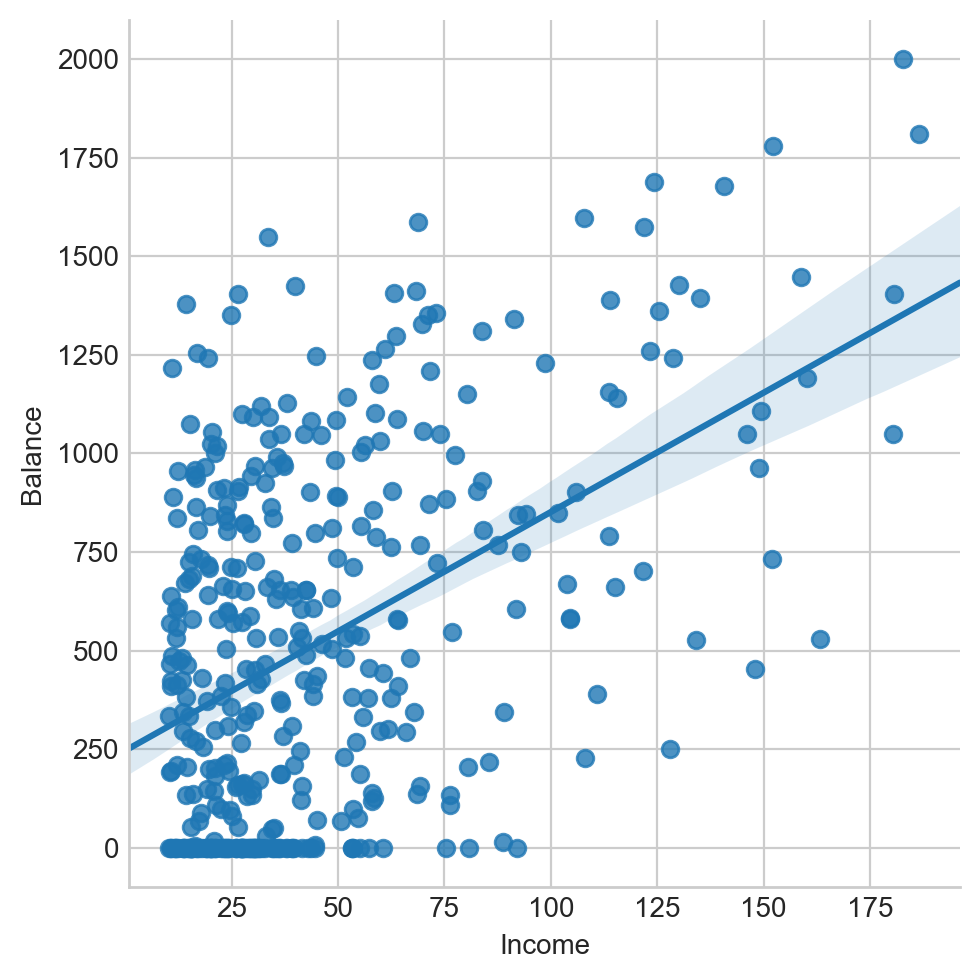

<Figure size 800x800 with 0 Axes>

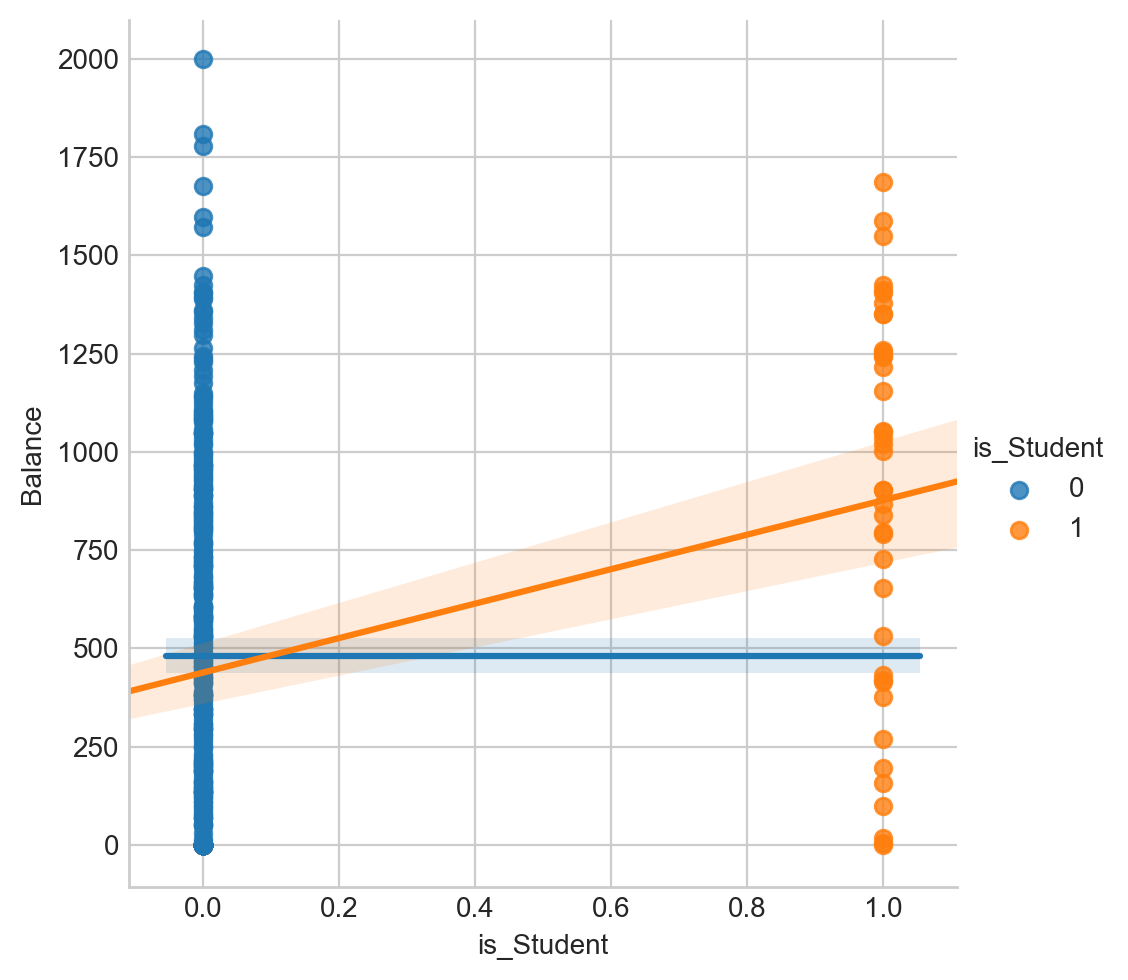

<Figure size 800x800 with 0 Axes>

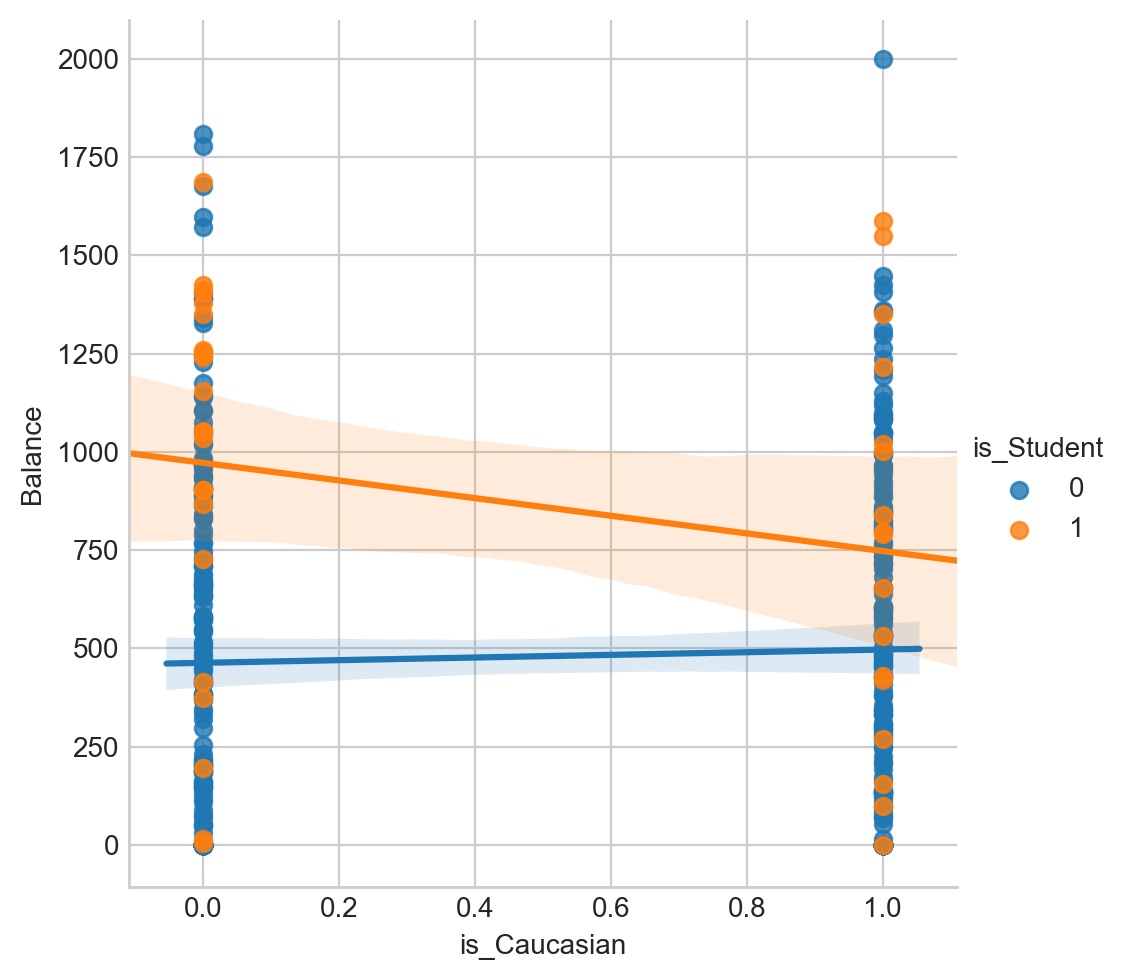

In [65]:
# Income, is_Student is_Caucasian
plt.figure(figsize=(4, 4))
sns.lmplot("Income", "Balance", df_clean)
plt.figure(figsize=(4, 4))
sns.lmplot("is_Student", "Balance", df_clean, hue = 'is_Student')
plt.figure(figsize=(4, 4))
sns.lmplot("is_Caucasian", "Balance", df_clean, hue = 'is_Student')
